#Predicting Batting Performance Using MLB Player Statistics
####Dataset Name: Sean Lahmans Baseball Database
####[Sean Lahmans Baseball Database](http://seanlahman.com/)
####Target Variable: ```Batting Average```
####Goal: Use player statistics to predict batting average and find influences that affect hitting performance.
The dataset comes from Sean Lahmans Baseball Database, which contains statistics on batting, pitching, fielding, standings, team stats, managerial records, postseason data, and more, dating back to 1871. My focus is on batting data, analyzing how different stats contribute to a players batting average. By using this data, regression machine learning techniques can be applied to predict batting performance. These predicts can help baseball analysts better understand player performance trends.
###20 Key Features We Used
  - At-Bats (AB)
  - Hits (H)
  - Runs (R)
  - Home Runs (HR)
  - Doubles (2B)  
  - Triples (3B)
  - Walks (BB)
  - Strikeouts (SO)
  - Intentional Walks (IBB)
  - Hit by Pitch (HBP)
  - Sacrifice Hits (SH)
  - Sacrifice Flies (SF)
  - Grounded into Double Plays (GIDP)
  - Stolen Bases (SB)
  - Caught Stealing (CS)
  - Gamples Played (G)
  - Plate Appearances (PA)
  - Batting Average (BA)
  - Slugging Percentage (SLG)
  - On-Base Percentage (OBP)
  - First Name
  - Last Name

Each record represents one season per player.

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import FuncFormatter

In [5]:
#loading both batting and players data
batting_df = pd.read_csv("/Users/griffinsnider/Desktop/Batting.csv", encoding='latin1')
players_df = pd.read_csv("/Users/griffinsnider/Desktop/People.csv", encoding='latin1')

#displaying the first 5 rows of batting/shape
display(batting_df.head(5))
print("df shape:", batting_df.shape)

#displaying the first 5 rows of players/shape
display(players_df.head(5))
print("df shape:", players_df.shape)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,NaN,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,aardsda01,2006,1,CHN,NL,45,NaN,2,0,0,...,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,aardsda01,2007,1,CHA,AL,25,NaN,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,aardsda01,2008,1,BOS,AL,47,NaN,1,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,aardsda01,2009,1,SEA,AL,73,NaN,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


df shape: (113799, 24)


,ID,playerID,birthYear,birthMonth,birthDay,birthCity,birthCountry,birthState,deathYear,deathMonth,...,nameLast,nameGiven,weight,height,bats,throws,debut,bbrefID,finalGame,retroID
0,1,aardsda01,1981.0,12.0,27.0,Denver,USA,CO,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,aardsda01,2015-08-23,aardd001
1,2,aaronha01,1934.0,2.0,5.0,Mobile,USA,AL,2021.0,1.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,aaronha01,1976-10-03,aaroh101
2,3,aaronto01,1939.0,8.0,5.0,Mobile,USA,AL,1984.0,8.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,aaronto01,1971-09-26,aarot101
3,4,aasedo01,1954.0,9.0,8.0,Orange,USA,CA,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,aasedo01,1990-10-03,aased001
4,5,abadan01,1972.0,8.0,25.0,Palm Beach,USA,FL,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,abadan01,2006-04-13,abada001


df shape: (21010, 25)


In [7]:
#check missing values in batting
print("Missing values in batting:\n", batting_df.isnull().sum())

#check missing values in players
print("\nMissing values in players:\n", players_df.isnull().sum())

Missing values in batting:
 playerID          0
yearID            0
stint             0
teamID            0
lgID            737
G                 0
G_batting    112184
AB                0
R                 0
H                 0
2B                0
3B                0
HR                0
RBI             756
SB             2368
CS            23542
BB                0
SO             2100
IBB           36651
HBP            2816
SH             6068
SF            36104
GIDP          25442
G_old        113799
dtype: int64

Missing values in players:
 ID                  0
playerID            0
birthYear         106
birthMonth        275
birthDay          417
birthCity         143
birthCountry       55
birthState        546
deathYear       10744
deathMonth      10745
deathDay        10746
deathCountry    10746
deathState      10806
deathCity       10748
nameFirst          34
nameLast            0
nameGiven          37
weight            845
height            765
bats             1218
throws    

In [9]:
#data cleaning
#remove unneeded columns from batting data
batting_df = batting_df.drop(columns=["G_batting", "G_old"])
#fill missing values with 0
batting_df.fillna(0, inplace=True)

#filter out players with very few at bats
batting_df = batting_df[batting_df["AB"] > 50]

#filling in na values with common values, or unknown
players_df = players_df.fillna({"bats": "R", "throws": "R", "nameFirst": "Unknown"})

#keep only playerID, nameFirst, nameLast, bats, and throws
players_df = players_df[["playerID", "nameFirst", "nameLast", "bats", "throws"]]

#merge batting stats with player stats
merged_df = batting_df.merge(players_df, on="playerID", how="left")

#display missing values in the merged data after cleaning
print("Missing values in the merged data:\n", merged_df.isnull().sum())

#feature definition
#define target variable
merged_df["BA"] = merged_df["H"] / merged_df["AB"]

#display first 5 rows of the merged data
print("Merged data with Batting Average:")
display(merged_df.head(5))
print("df shape:", merged_df.shape)

Missing values in the merged data:
 playerID     0
yearID       0
stint        0
teamID       0
lgID         0
G            0
AB           0
R            0
H            0
2B           0
3B           0
HR           0
RBI          0
SB           0
CS           0
BB           0
SO           0
IBB          0
HBP          0
SH           0
SF           0
GIDP         0
nameFirst    0
nameLast     0
bats         0
throws       0
dtype: int64
Merged data with Batting Average:


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,BA
0,aaronha01,1954,1,ML1,NL,122,468,58,131,27,...,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,0.279915
1,aaronha01,1955,1,ML1,NL,153,602,105,189,37,...,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,0.313953
2,aaronha01,1956,1,ML1,NL,153,609,106,200,34,...,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,0.328407
3,aaronha01,1957,1,ML1,NL,151,615,118,198,27,...,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,0.321951
4,aaronha01,1958,1,ML1,NL,153,601,109,196,34,...,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,0.326123


df shape: (54537, 27)


#Exploratory Data Analysis

This section visualizes the distribution of six batting statistics: batting average (BA), homeruns (HR), strikeouts (SO), walks (BB), hits (H), and stolen bases (SB). Using histograms to help us see player performance accross different metrics.

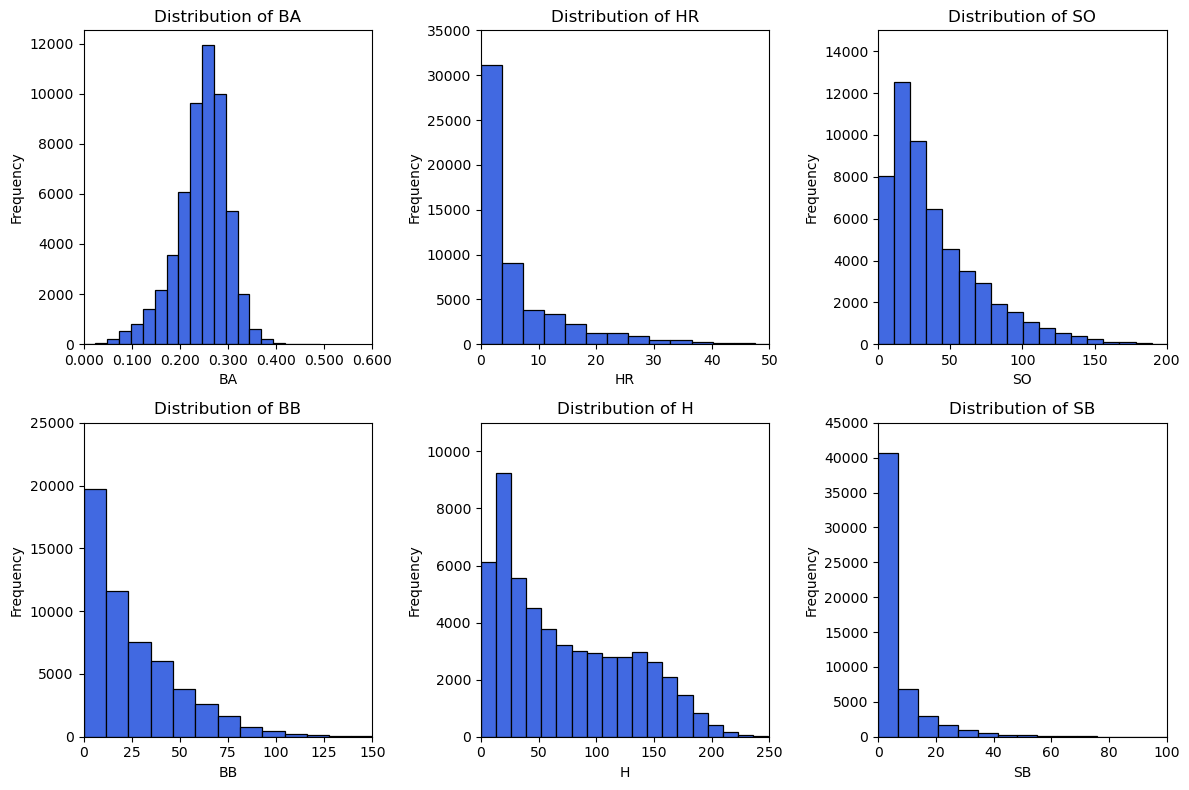

In [12]:
batting_stats = ["BA", "HR", "SO", "BB", "H", "SB"]

#setting the fig size
plt.figure(figsize=(12, 8))
#loop through each stat in batting_stats and create a histogram
for i, col in enumerate(batting_stats, 1):
    plt.subplot(2, 3, i) #create a 2 row, 3 column grid for the graphs

    #histogram plot for the current batting stat
    sns.histplot(merged_df[col], bins=20, color="royalblue", alpha=1)

    #adjust axis formatting and formatting columns
    if col == "BA": #batting average graph
        plt.xlim(0.000, 0.600) #setting x axis for batting average
        plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.3f}"))  #force 3 decimal places in the x axis for batting average
    elif col == "HR": #home runs
        plt.xlim(0, 50) #set x axis limit for homeruns
        plt.ylim(0, 35000) #set y axis limit for freq of home run values
    elif col == "SO": #strike outs
        plt.xlim(0, 200) #set x axis limit for strikeouts
        plt.ylim(0, 15000) #set y axis limit for freq of strikeout values
    elif col == "BB": #walks
        plt.xlim(0, 150) #set x axis limit for walks
        plt.ylim(0, 25000) #set y axis limit for freq of walks values
    elif col == "H": #hits
        plt.xlim(0, 250) #set x axis limit for hits
        plt.ylim(0, 11000) #set y axis limit for freq of hits values
    elif col == "SB": #stolen bases
        plt.xlim(0, 100) #set x axis limit for stolen bases
        plt.ylim(0, 45000) #set yaxis limit for freq of stolen bases values

    #title and lables for each subplot
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

#adjust layout to prevent overlapping
plt.tight_layout()
#display the plots
plt.show()


##Observations


---


###Distribution of BA
- The shape is bell-like, centered between 0.200 and 0.300
- Very few players fall below 0.100 or above 0.400, showing such extremes are rare.
- This graph is less skewed than the HR, SO, or others because batting average is a rate statistic. It doesnt rise with more playing time.

###Distribution of HR
- Strong right skew: most players have few home runs (0-5), and fewer achieve high totals (20+).
- You can see a long tail stretching towards 40-50 home runs, but the tail is very thing.

###Distribution of SO
- Also right-skewed: most players have few strikeouts (0-50) and then tapers off.

###Distribution of BB
- Another right-skew graph: plenty of players record only a handful of walks.
- The bulk is to the left (under ~25 BB), but there are some outliers with 75+ BB.

###Distribution of Stolen Bases
- Right-skewed, with many players having only 0-5 stolen bases.
- Some outliers go up to 50-100 steals, but are rare.


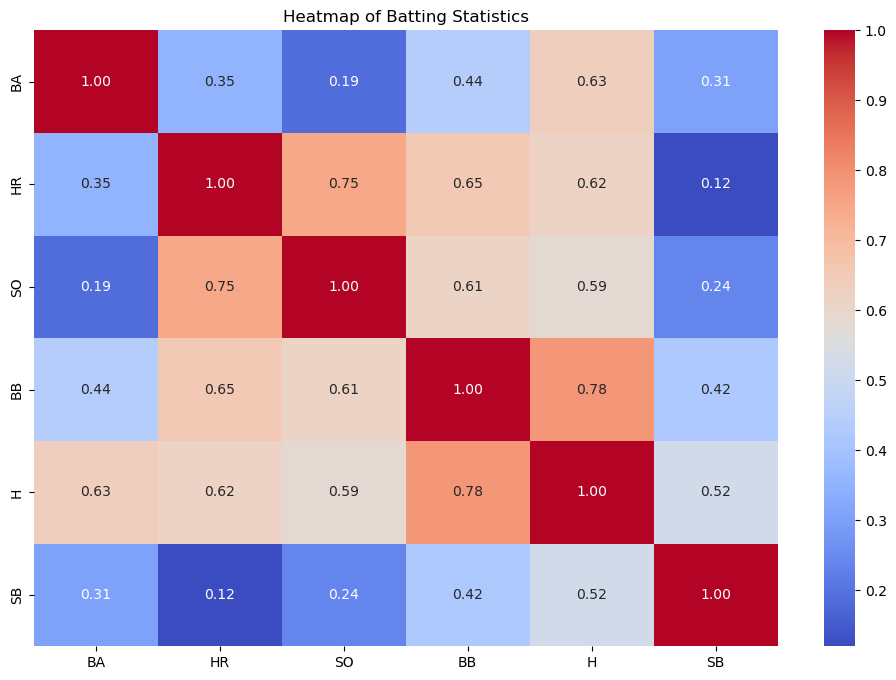

In [15]:
#setting the fig size
plt.figure(figsize=(12, 8))

#generate a heatmap showing the correlation between batting stats
correlation_matrix = merged_df[batting_stats].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

#title to the heatmap
plt.title("Heatmap of Batting Statistics")
#display the plot
plt.show()


##Observations


---


###Mostly Moderate to High Correlations:
- Everything is postively correlated. This shows that players who accumulate more of one stat (ex. HR) also tend to accumulate more in other stats (ex. BB, H) often because of increased playing time or certain hitting profiles.

###High HR-SO Correlation (0.75)
- Home runs and strikeouts go hand in hand for power hitters. Power hitters tend to strike out more frequently, so HR and SO have a strong postive association

###High BB-H Correlation (0.78)
- Walks and hits both generally increase with overall plate appearances. High-volume hitters who get a lot of at-bats also walk more.

###Relatively Low HR–SB Correlation (0.12)
- Power hitting (HR) and base stealing (SB) represent different skill sets, so they are only weakly related. Its common to see “speed” players (high SB) without many home runs, and vice versa.

###BA (Batting Average) is Moderately Correlated with Hits (0.63)
- This makes intuitive sense: BA = Hits / AB (at bats). More hits usually raises BA, and players who consistently put the ball in play for hits tend to have higher averages.

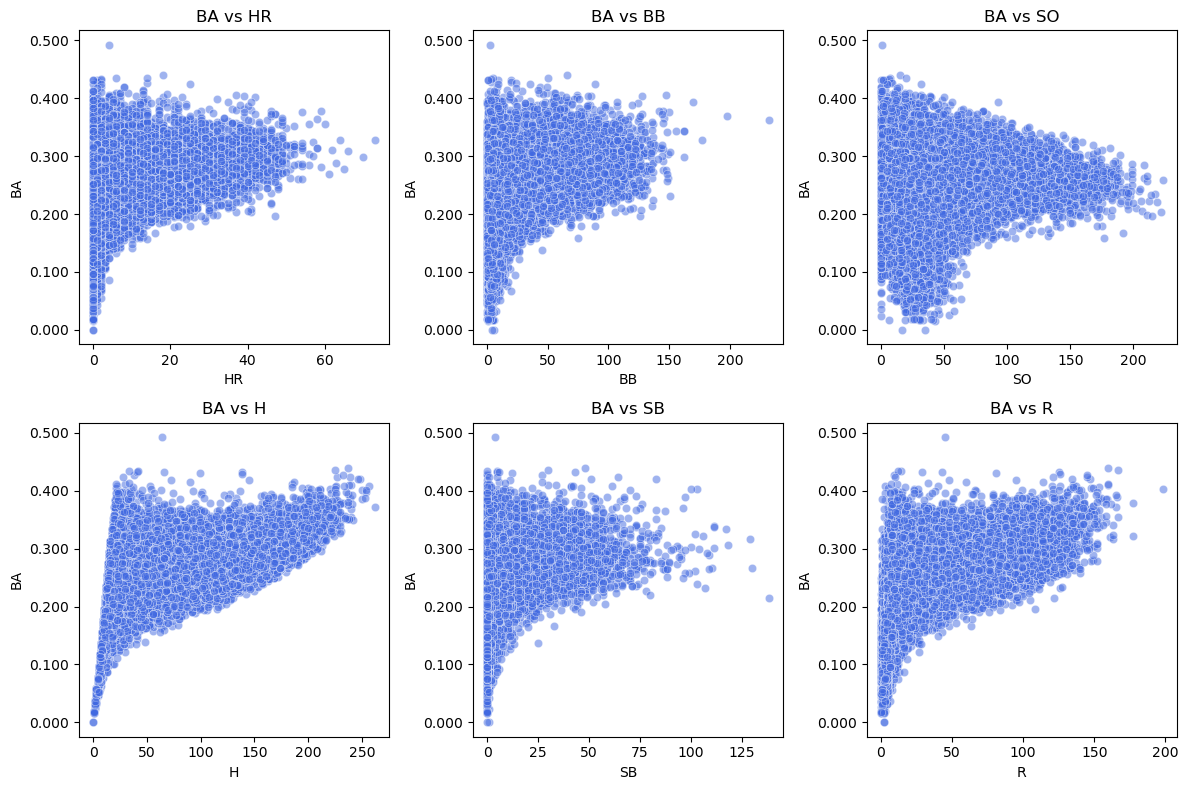

In [18]:
#list of batting stats to compare to with batting avg
stats_to_compare = ["HR", "BB", "SO", "H", "SB", "R"]

#set the fig size
plt.figure(figsize=(12, 8))
#loop through each stat in stats_to_comapre and create a scatter plots
for i, stat in enumerate(stats_to_compare, 1):
    plt.subplot(2, 3, i) #create 2 rows, 3 column grid

    #scatterplot to show the relationship between batting avg and stats_to_compare
    sns.scatterplot(x=merged_df[stat], y=merged_df["BA"], alpha=0.5, color="royalblue") #x axis selected batting stat, y axis will be the batting avg
    #format to show 3 decimals for batting avg
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.3f}"))

    #title and lables for each sub plot
    plt.title(f"BA vs {stat}")
    plt.xlabel(stat)
    plt.ylabel("BA")

#adjust the layout to prevent overlapping
plt.tight_layout()
#display the plots
plt.show()


###Observations


---


###Overall Shape:
- In each plot, you see a wide vertical spread in BA when the counting stat (HR, BB, SO, etc) is close to zero, but that spread narrows as the counting stat gets larger.

###BA vs HR:
- A few high HR hitters can still maintain high averages, but theres no strict rule - some big sluggers sit around .250 while others are closer to .300+

###BA vs BB:
- Hitters who draw a large number of walks tend to be more patient/selective, which can correlate with hitting for a decent average.
- Still, we see variation. Some players with few walks but a high BA rely on putting the ball in play rather than drawing walks.

###BA vs SO:
- As strikeouts go up, we see more data points dipping into lower BA territory, showing a negative correlation.
- That said, there are some high SO players who maintain a solid BA. They are just less common.

###BA vs H:
- This is the most intuitive positive relationship: accumulating many hits generally raises batting average.

###BA vs SB
- Speed players may be able to leg out more infield hits, which can boost BA, but theres still a wide range of BA values for different base stealers.

###BA vs R
- Scoring more runs generally correlates with being on base more often (hence a decent batting average), but many other factors contribute (team context, batting order. etc).

####Key Takeaway:
- The plots show theres no single stat that perfectly predicts BA, but a few (notably H and BB) show moderately stronger alignment, consistent with the correlation heatmap.

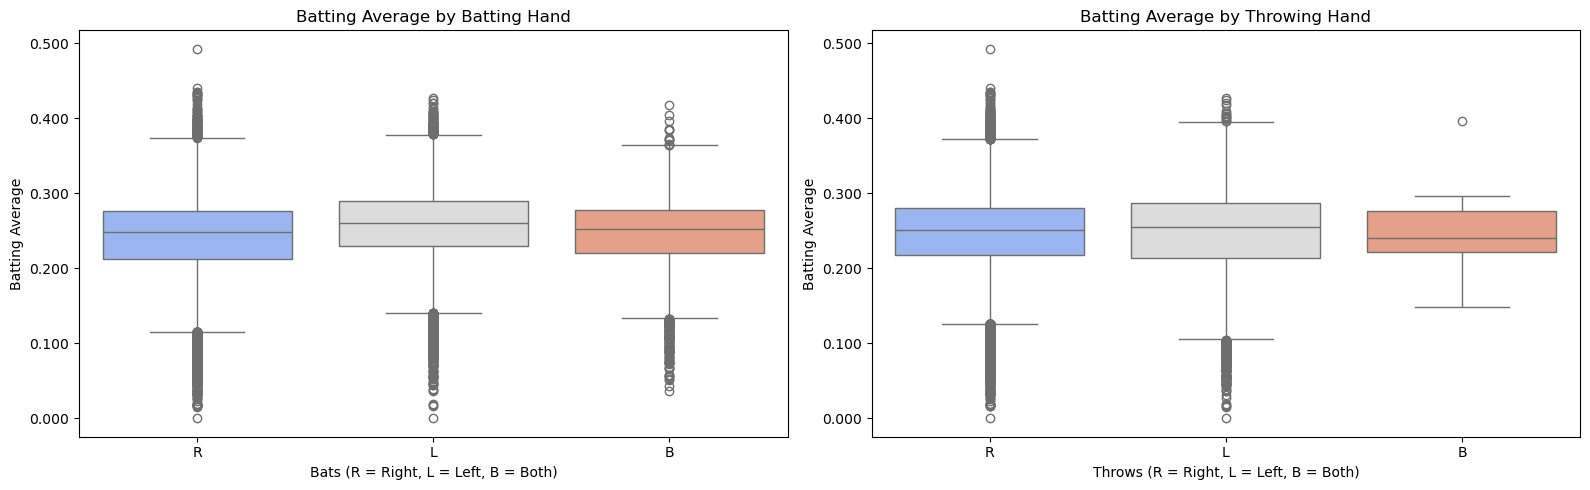

In [21]:
#set figure with 1 row and 2 columns of subplots + setting fig size
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

#boxplot the distribution of batting avg by batting hand
sns.boxplot(x="bats", y="BA", data=merged_df, hue="bats", palette="coolwarm", ax=ax[0], legend=False) #x axis batting hand and y axis batting average
#format to show 3 decimals for batting avg
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.3f}"))

#setting labels and title for the plot
ax[0].set_title("Batting Average by Batting Hand")
ax[0].set_xlabel("Bats (R = Right, L = Left, B = Both)")
ax[0].set_ylabel("Batting Average") #

#boxplot the distribution of batting avg by throwing hand
sns.boxplot(x="throws", y="BA", data=merged_df, hue="throws", palette="coolwarm", ax=ax[1], legend=False) #x axis throwing hand and y axis batting average
#format to show 3 decimals for batting avg
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.3f}"))

#setting labels and title for the plot
ax[1].set_title("Batting Average by Throwing Hand")
ax[1].set_xlabel("Throws (R = Right, L = Left, B = Both)")
ax[1].set_ylabel("Batting Average")

#adjust the layout to prevent overlapping
plt.tight_layout()
#display the plots
plt.show()


##Observations


---


###Batting Hand:
- Left handed and switch hitters often show slightly higher BAs than right handed batters. This is consistent with the long understood advantage of facing mostly right handed pitching from the left side of the plate.
- There is still quite a bit of overlap: some right handed batters post high averages, and plenty of lefties sit closer to league average.
- You can also see a handful of outliers at both the high end (.450+) and low (.150-)end in each group

###Throwing Hand:
- Many position players throw right handed, so that box has a wider spread and more outliers due to sheer sample size.
- The smaller sample of left or switch throwers produces narrower distributions.
- There doesnt appear to be as strong a relationship with throwing hand as there is with batting hand.

###Defaulting Missing Values
- Because players with missing values were labeled as right handed, the R category might be inflated. This may of slightly shifted the distribution and introduced noise.

###Overall Takeaways:
- Batting side shows a clearer influence on batting average than throwing hand.
- The advantage of batting left or both sides is visible but not absolute.
- Missing data imputation may bias the “right‐handed” groups if that was not the true value, so caution in interpreting these boxplots.

#Splitting the data into training, validation, and test sets.

In [25]:
#define features
X = merged_df.drop(columns=["BA", "playerID", "nameFirst", "nameLast", "AB", "H"])
#dropping hits, at bats, and batting average so the model cannot cheat by directly learning the 'h / ab' ratio

y = merged_df["BA"] #target

#split into training 70% and temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

#split temp into validation 15% and test 15%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

#display target
print("Target: Batting Average")
print("\n Training and Testing Features:")
print("----------------------------")
for feature in X.columns:
    print("- ", feature)
print("----------------------------")
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Target: Batting Average

 Training and Testing Features:
----------------------------
-  yearID
-  stint
-  teamID
-  lgID
-  G
-  R
-  2B
-  3B
-  HR
-  RBI
-  SB
-  CS
-  BB
-  SO
-  IBB
-  HBP
-  SH
-  SF
-  GIDP
-  bats
-  throws
----------------------------
Training set size: (38175, 21) (38175,)
Validation set size: (8181, 21) (8181,)
Testing set size: (8181, 21) (8181,)


#Feature Engineering

In [28]:
#new features

#create a "decade" feature from yearID
for dataset in [X_train, X_val, X_test]:
    dataset['decade'] = (dataset['yearID'] // 10) * 10

#define which columns we want to dummy encode
categorical_features = ['teamID', 'lgID', 'bats', 'throws', 'decade']

#encoding to the cateogrical features in training, validation, and test sets
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_val   = pd.get_dummies(X_val, columns=categorical_features, drop_first=True)
X_test  = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

#after get_dummies, each set can end up with different columns if some categories are missing in smaller subsets
#so we find the common columns across all three sets to ensure consistency
common_cols = X_train.columns.intersection(X_val.columns).intersection(X_test.columns)

#align each dataset to the common columns so they have the same shape and feature names
X_train = X_train[common_cols]
X_val   = X_val[common_cols]
X_test  = X_test[common_cols]

#feature transformations

#for home runs and rbis, we create a log transform column (log1p = log(x+1))
#which helps with zero values and stabilizes skewed distributions
for col in ['HR', 'RBI']:
    X_train['log_' + col] = np.log1p(X_train[col])
    X_val['log_' + col]   = np.log1p(X_val[col])
    X_test['log_' + col]  = np.log1p(X_test[col])

#for Strikeouts (SO), we use a square root transform, which can also help reduce skew
for col in ['SO']:
    X_train['sqrt_' + col] = np.sqrt(X_train[col])
    X_val['sqrt_' + col]   = np.sqrt(X_val[col])
    X_test['sqrt_' + col]  = np.sqrt(X_test[col])

#displaying the transformed training set
print("Transformed X_train head:")
display(X_train.head())

Transformed X_train head:


,yearID,stint,G,R,2B,3B,HR,RBI,SB,CS,...,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,decade_2020,log_HR,log_RBI,sqrt_SO
15178,1883,1,75,31,10,6,1,0.0,0.0,0.0,...,False,False,False,False,False,False,False,0.693147,0.000000,0.000000
1383,1937,1,117,60,27,4,10,60.0,5.0,0.0,...,False,False,False,False,False,False,False,2.397895,4.110874,5.656854
42246,2007,1,162,139,38,20,30,94.0,41.0,6.0,...,False,False,False,False,True,False,False,3.433987,4.553877,9.219544
8765,2006,1,112,33,16,0,3,23.0,1.0,1.0,...,False,False,False,False,True,False,False,1.386294,3.178054,5.744563
48919,2000,1,158,106,33,1,37,106.0,1.0,0.0,...,False,False,False,False,True,False,False,3.637586,4.672829,13.076697


#Rescaling the data

In [31]:
#StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

#fit the scaler on the training data to learn the training set's mean and standard deviation
scaler.fit(X_train)

#apply the scaler to each dataset
#this uses the same scaling parameters learned from the training set
#(ex. same mean and std), ensuring consistent scaling.
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

#display a preview of the scaled training data
print("Scaled Training Data (first 5 rows):")
display(X_train_scaled.head())

Scaled Training Data (first 5 rows):


,yearID,stint,G,R,2B,3B,HR,RBI,SB,CS,...,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,decade_2020,log_HR,log_RBI,sqrt_SO
15178,-1.903050,-0.248911,-0.219497,-0.198099,-0.237585,1.091846,-0.596592,-1.151218,-0.577437,-0.577747,...,-0.273177,-0.301395,-0.307865,-0.32144,-0.335536,-0.336405,-0.198275,-0.593965,-2.972067,-2.309015
1383,-0.607610,-0.248911,0.729265,0.748252,1.356799,0.473297,0.493847,0.901323,-0.071823,-0.577747,...,-0.273177,-0.301395,-0.307865,-0.32144,-0.335536,-0.336405,-0.198275,0.970894,0.959732,-0.043753
42246,1.071664,-0.248911,1.745796,3.326240,2.388459,5.421688,2.917046,2.064430,3.568596,1.303666,...,-0.273177,-0.301395,-0.307865,-0.32144,2.980305,-0.336405,-0.198275,1.921965,1.383437,1.382911
8765,1.047674,-0.248911,0.616317,-0.132833,0.325139,-0.763800,-0.354273,-0.364411,-0.476314,-0.264178,...,-0.273177,-0.301395,-0.307865,-0.32144,2.980305,-0.336405,-0.198275,0.042304,0.067547,-0.008630
48919,0.903736,-0.248911,1.655438,2.249359,1.919523,-0.454526,3.765165,2.474939,-0.476314,-0.577747,...,-0.273177,-0.301395,-0.307865,-0.32144,2.980305,-0.336405,-0.198275,2.108857,1.497207,2.927491


#Train/Tune Models 

In [34]:
#basic k neighbors regressor model
knn = KNeighborsRegressor()

#define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15], #different values of k
    'weights': ['uniform', 'distance'], #whether to use uniform weighting or distance-based weighting for neighbors
    'p': [1, 2] #the power parameter for the minkowski distance (1 = manhattan distance, 2 = euclidean distance)
}

#set up a gridsearchCV to try all parameter combinations in 'param_grid'
#cv=5 means we use 5-fold cross-validation for each combinatio
#scoring='r2' means we'll use the R-squared metric to evaluate performance
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='r2')

#fit the grid search on the scaled training data
grid_search_knn.fit(X_train_scaled, y_train)

#after fitting, 'best_params_' holds the combination of hyperparameters that gave the best average CV score
print("Best k for kNN:", grid_search_knn.best_params_['n_neighbors'])
print("Best CV R2 for kNN:", grid_search_knn.best_score_)

#make predictions on the scaled validation set using the best found model
y_val_pred = grid_search_knn.predict(X_val_scaled)

#see performance on the validation set using R2 and RMSE
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

#display the validation R2 and RMSE
print("Validation R2:", r2_val)
print("Validation RMSE:", rmse_val)

Best k for kNN: 9
Best CV R2 for kNN: 0.4867797311379419
Validation R2: 0.5157178865787696
Validation RMSE: 0.03715005371244177


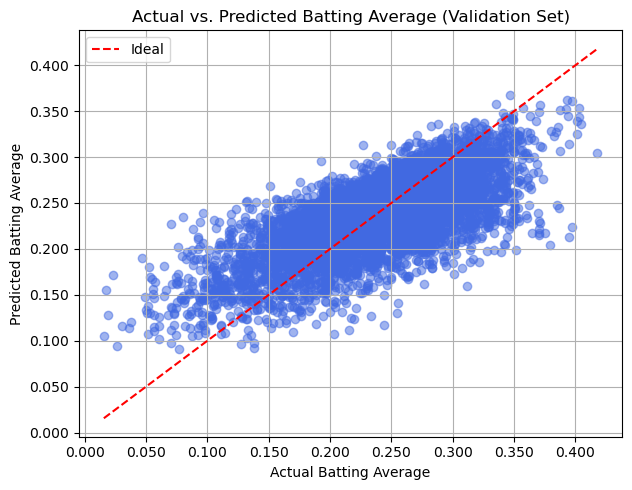

In [36]:
#get results from gridsearchCV
results = grid_search_knn.cv_results_

#get array of n_neighbors values from the parameter grid
neighbors = param_grid['n_neighbors']

#get the mean test scores for each hyperparameter combo
mean_cv_scores = results['mean_test_score']

#create a figure
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
#scatter plot of actual vs. predicted batting average on the validation set
plt.scatter(y_val, y_val_pred, alpha=0.5, color='royalblue')

#setting labels and title for the plot
plt.title('Actual vs. Predicted Batting Average (Validation Set)')
plt.xlabel('Actual Batting Average')
plt.ylabel('Predicted Batting Average')

#format to show 3 decimals for batting avg
formatter = FuncFormatter(lambda x, pos: f'{x:.3f}')
ax = plt.gca() #get current axes

ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

#define the min and max range for the ideal line
min_val = min(min(y_val), min(y_val_pred))
max_val = max(max(y_val), max(y_val_pred))

#plot the idea line
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal')
plt.legend()
plt.grid(True)

#display the plot
plt.tight_layout()
plt.show()


##Observations


---


###Chosen Hyperparameters:
- Grid search identified k=9 as the best balance between bias and variance.

###Cross-Validation Performance
- The best average cross validated R2 came out to 0.4868.

###Validation Performance
- On the separate validation set, the model achieved an R2 of 0.5157, showing slightly better predictive performance than the cross validation average

In [39]:
merged_df["decade"] = (merged_df["yearID"] // 10) * 10

#define the list of decades to analyze
decades = [1960, 1970, 1980, 1990, 2000, 2010]

#store perforamce results for each decade
performance_by_decade_knn = {}

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15], #different values of k
    'weights': ['uniform', 'distance'], #whether to use uniform weighting or distance-based weighting for neighbors
    'p': [1, 2] #the power parameter for the minkowski distance (1 = manhattan distance, 2 = euclidean distance)
}

#loop over each decade in the list
for dec in decades:
    #filter the merged_df to only include rows for the current decade
    df_dec = merged_df[merged_df['decade'] == dec].copy()

    #dropping  HITS, AT BATS, and BATTING AVERAGE, so the model cannot cheat by directly learning the 'h / ab' ratio
    X_dec = df_dec.drop(columns=["BA", "playerID", "nameFirst", "nameLast", "H", "AB"])
    y_dec = df_dec["BA"] #target

    #convert categorical features in X_dec to dummy variables
    X_dec = pd.get_dummies(X_dec, drop_first=True)

    #split decade-specific data into train (70%) and test (30%)
    X_train_dec, X_test_dec, y_train_dec, y_test_dec = train_test_split(
        X_dec, y_dec, test_size=0.30, random_state=42
    )

    #scale the features using StandardScaler
    #(fit on training set, then transform both train & test)
    scaler = StandardScaler()
    X_train_dec_scaled = scaler.fit_transform(X_train_dec)
    X_test_dec_scaled = scaler.transform(X_test_dec)

    #basic k neighbors regressor model
    knn = KNeighborsRegressor()

    #set up a gridsearchCV to try all parameter combinations in 'param_grid'
    #cv=5 means we use 5-fold cross-validation for each combinatio
    #scoring='r2' means we'll use the R-squared metric to evaluate performance
    grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='r2')

    #fit the grid search on the scaled training data
    grid_search_knn.fit(X_train_dec_scaled, y_train_dec)

    #get the best estimator from the grid search
    best_knn = grid_search_knn.best_estimator_

    #predict on the scaled test set
    y_pred_dec = best_knn.predict(X_test_dec_scaled)

    #see performance on the set using R2 and RMSE
    r2_dec = r2_score(y_test_dec, y_pred_dec)
    rmse_dec = np.sqrt(mean_squared_error(y_test_dec, y_pred_dec))

    #store the performance metrics
    performance_by_decade_knn[dec] = {
        'Best Params': grid_search_knn.best_params_,
        'CV_R2': grid_search_knn.best_score_,
        'Test_R2': r2_dec,
        'Test_RMSE': rmse_dec
    }

    #print out results for this decade
    print(f"Decade: {dec}")
    print(f"  Best Params: {grid_search_knn.best_params_}")
    print(f"  CV R2: {grid_search_knn.best_score_:.3f}")
    print(f"  Test R2: {r2_dec:.3f}")
    print(f"  Test RMSE: {rmse_dec:.3f}")
    print("-" * 30)

Decade: 1960
  Best Params: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
  CV R2: 0.533
  Test R2: 0.553
  Test RMSE: 0.038
------------------------------
Decade: 1970
  Best Params: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
  CV R2: 0.469
  Test R2: 0.493
  Test RMSE: 0.038
------------------------------
Decade: 1980
  Best Params: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
  CV R2: 0.413
  Test R2: 0.444
  Test RMSE: 0.037
------------------------------
Decade: 1990
  Best Params: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
  CV R2: 0.410
  Test R2: 0.424
  Test RMSE: 0.039
------------------------------
Decade: 2000
  Best Params: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
  CV R2: 0.420
  Test R2: 0.474
  Test RMSE: 0.036
------------------------------
Decade: 2010
  Best Params: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
  CV R2: 0.400
  Test R2: 0.432
  Test RMSE: 0.036
------------------------------


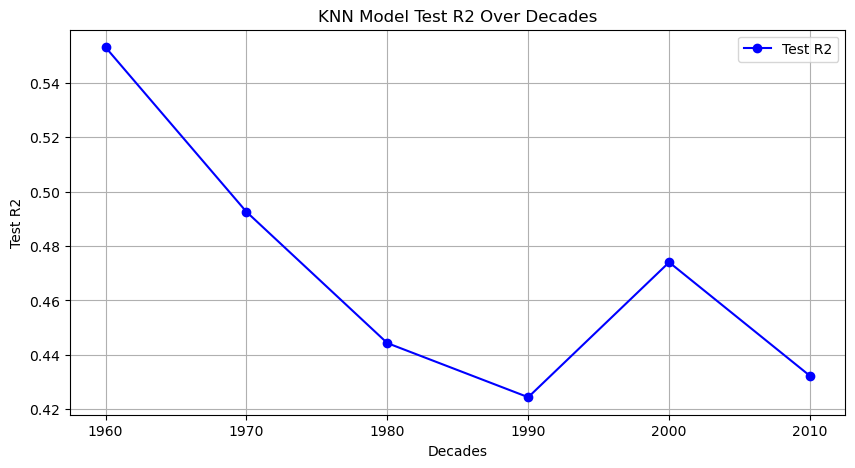

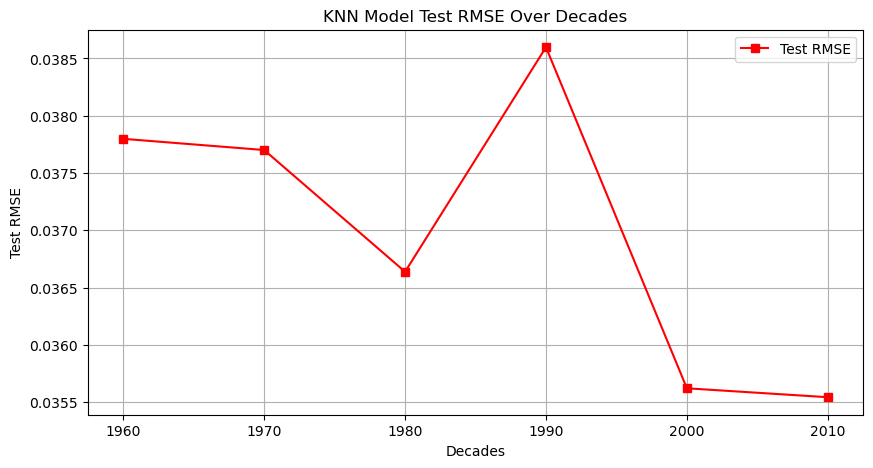

In [41]:
#extract decades from the dictionary keys
decades = list(performance_by_decade_knn.keys())
#build lists that hold the test r2 and rmse values for each decade
test_r2_values = [performance_by_decade_knn[dec]['Test_R2'] for dec in decades]
test_rmse_values = [performance_by_decade_knn[dec]['Test_RMSE'] for dec in decades]

#create a figure
plt.figure(figsize=(10, 5))
#plot decades on the x-axis and the test r2
plt.plot(decades, test_r2_values, marker="o", linestyle="-", color="blue", label="Test R2")

#set labels and the title
plt.xlabel("Decades")
plt.ylabel("Test R2")
plt.title("KNN Model Test R2 Over Decades")
plt.grid(True)
plt.legend()
plt.show()

#create a figure
plt.figure(figsize=(10, 5))
#plot decades on the x-axis and the test rmse
plt.plot(decades, test_rmse_values, marker="s", linestyle="-", color="red", label="Test RMSE")

#setting labels and title for the plot
plt.xlabel("Decades")
plt.ylabel("Test RMSE")
plt.title("KNN Model Test RMSE Over Decades")
plt.grid(True)
plt.legend()
plt.show()


##Observations


---


###Overall Trend:
- Model performance tends to be highest in the 1960s and then generally declines through the 1980s/1990s before rebounding somewhat in the 2000s.
- The RMSE shows a similar but slightly less trend, with higher errors in the 1990s and lower errors in the 2000s/2010s.

###Hyperparameter Choices
- For most decades, the best choice was distance based weighting with manhattan distance (p = 1) and between 9 to 15 neighbors.

###Possible Reasons for Performance Differences
- Shifts in playing style, training methods, or league conditions over time change relationships among features, causing the model to perform better or worse in certain decades.
- Sample sizes also vary across decades, influencing how well the model can learn.

In [44]:
#define the parameter grid for the RandomForestRegressor.
param_grid_rf = {
    'n_estimators': [50, 100, 200], #num trees in forest
    'min_samples_leaf': [5, 9, 15] #min num of samples required
}

#create a grid search to find best combo
#uses 5-fold cross-validation
#uses the R2 metric to measure performance
grid_search_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

#fit the gridsearch on the scaled training set
grid_search_rf.fit(X_train_scaled, y_train)

#print out the best parameters found in the grid search
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best CV R2 for Random Forest:", grid_search_rf.best_score_)

#take the best hyperparameters from the grid search
n_estimators_best = grid_search_rf.best_params_['n_estimators']
min_samples_leaf_best = grid_search_rf.best_params_['min_samples_leaf']

#put the best parameters and fit it on the training data
rf_model = RandomForestRegressor(
    n_estimators=n_estimators_best,
    random_state=42,
    min_samples_leaf=min_samples_leaf_best
)

rf_model.fit(X_train_scaled, y_train)

#predict on the scaled test set
y_pred = rf_model.predict(X_test_scaled)

#calculate the rmse
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#display the model
print("\nRandom Forest Model Performance Stats:")
print("----------------------------------------")
print("Root Mean Squared Error - RMSE:", round(rmse, 4))

train_r2 = rf_model.score(X_train_scaled, y_train)
test_r2 = r2_score(y_test, y_pred)

print("Train R2:", round(train_r2, 4))
print("Test R2:", round(test_r2, 4))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Random Forest: {'min_samples_leaf': 5, 'n_estimators': 200}
Best CV R2 for Random Forest: 0.683434411566298

Random Forest Model Performance Stats:
----------------------------------------
Root Mean Squared Error - RMSE: 0.0304
Train R2: 0.8623
Test R2: 0.6789


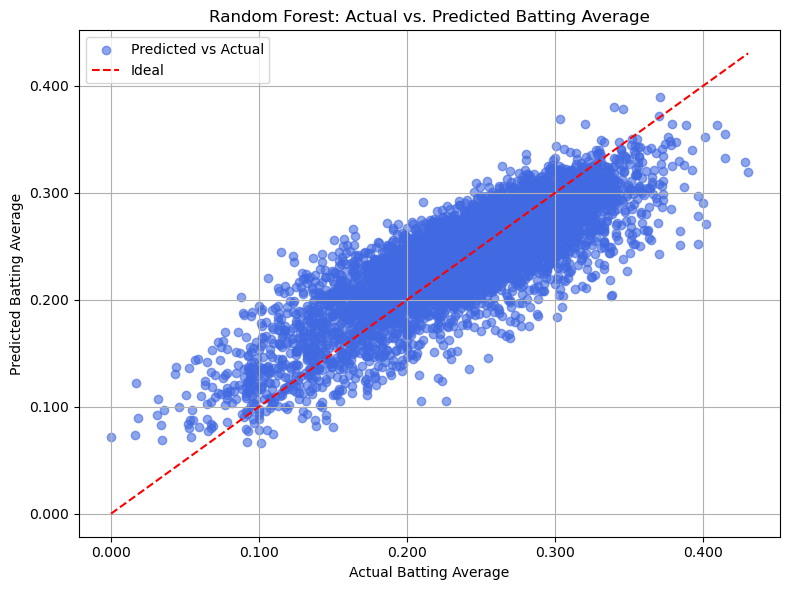

In [46]:
#create a figure
plt.figure(figsize=(8, 6))
#scatter plot comparing actual vs predicted ba on the test set
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, label='Predicted vs Actual')
#plot a ideal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')

#title and labels
plt.title('Random Forest: Actual vs. Predicted Batting Average')
plt.xlabel('Actual Batting Average')
plt.ylabel('Predicted Batting Average')

#format to show 3 decimals for batting avg
formatter = FuncFormatter(lambda x, pos: f'{x:.3f}')
ax = plt.gca() #get current axes

ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

#display the plot
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###Observations


---


###Hyperparameter Tuning:
- min_samples_leaf=5 and n_estimators=200 was the best combination. The model worked well from a larger number of trees and a higher minimum leaf size.

###Cross-Validation vs. Test
- The best cross validated R2 was about 0.683, showing that, on average, the chosen hyperparameters generalize well across folds
- The random forest achieved an R2 of 0.679

###Model Accuracy (RMSE)
- The RMSE of 0.0304 translates to an average error of roughly three points in batting average—meaning the model’s predictions tend to be within about 0.030 of the actual batting average.

###Train vs. Test Performance
- The train R2 of 0.862 shows the model fits the training data well.
- The gap between train R2 (0.862) and test R2 (0.679) is noticeable but not extreme, suggesting a balanced fit with some variance but not severe overfitting

###Overall:
- Overall, the random forest model provides stronger predictive performance than simpler models like the kNN.

In [49]:
#create an empty dictionary to hold r2 and rmse results for each decade
performance_by_decade = {}

#loop through each decade
for dec in decades:
    #filter rows in 'merged_df' so we only look at data for the current decade
    df_dec = merged_df[merged_df['decade'] == dec].copy()

    X_dec = df_dec.drop(columns=["BA", "playerID", "nameFirst", "nameLast", "H", "AB"])
    y_dec = df_dec["BA"]

    X_dec = pd.get_dummies(X_dec, drop_first=True)

    X_train_dec, X_test_dec, y_train_dec, y_test_dec = train_test_split(X_dec, y_dec, test_size=0.30, random_state=42)

    #create a random forest regressor with parameters
    rf = RandomForestRegressor(random_state=42, n_estimators=200, min_samples_leaf=5)
    #fit the model on the training data
    rf.fit(X_train_dec, y_train_dec)

    #predict on the test set
    y_pred_dec = rf.predict(X_test_dec)
    #calculate r2 and rmse as
    r2_dec = r2_score(y_test_dec, y_pred_dec)
    rmse_dec = np.sqrt(mean_squared_error(y_test_dec, y_pred_dec))

    #store these metrics in the dictionary
    performance_by_decade[dec] = {'R2': r2_dec, 'RMSE': rmse_dec}

    #print the results
    print(f"Decade: {dec}")
    print(f"  Test R2: {r2_dec:.3f}")
    print(f"  Test RMSE: {rmse_dec:.3f}")
    print("-" * 30)

Decade: 1960
  Test R2: 0.755
  Test RMSE: 0.028
------------------------------
Decade: 1970
  Test R2: 0.687
  Test RMSE: 0.030
------------------------------
Decade: 1980
  Test R2: 0.611
  Test RMSE: 0.031
------------------------------
Decade: 1990
  Test R2: 0.660
  Test RMSE: 0.030
------------------------------
Decade: 2000
  Test R2: 0.672
  Test RMSE: 0.028
------------------------------
Decade: 2010
  Test R2: 0.631
  Test RMSE: 0.029
------------------------------


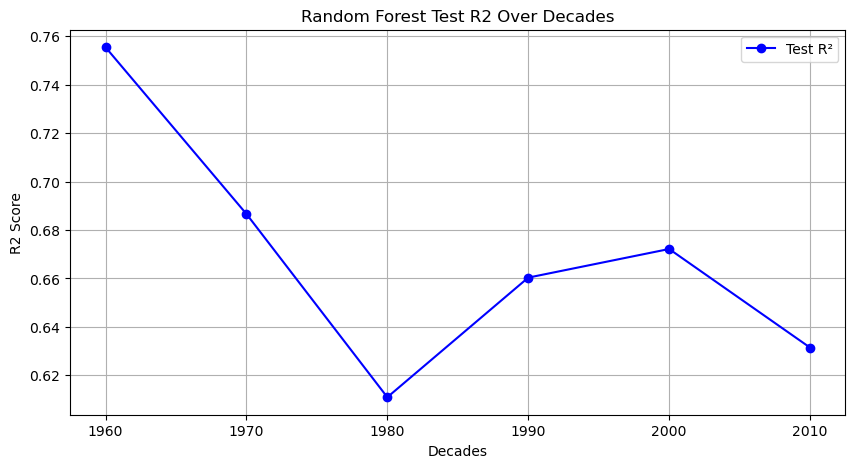

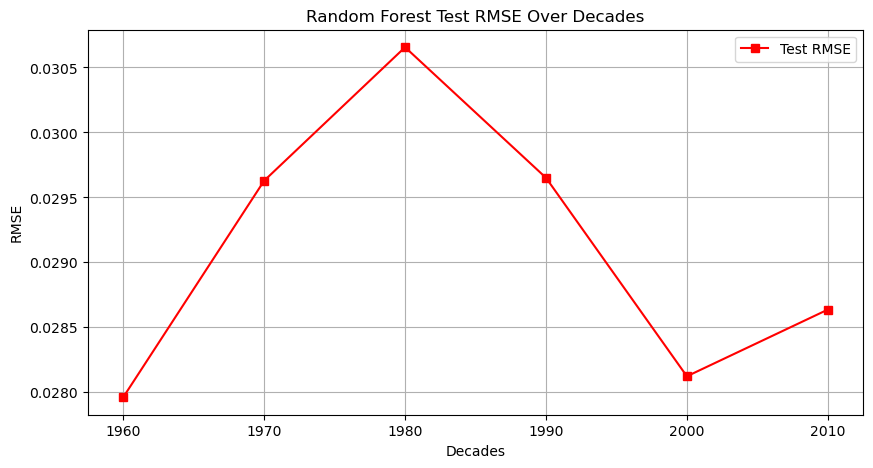

In [51]:
#extract decades from the dictionary keys
decades = list(performance_by_decade.keys())
#build lists that hold the test r2 and rmse values for each decade
r2_values = [performance_by_decade[dec]['R2'] for dec in decades]
rmse_values = [performance_by_decade[dec]['RMSE'] for dec in decades]

#create a fig
plt.figure(figsize=(10, 5))
#plot decades on x and r2 on y
plt.plot(decades, r2_values, marker="o", linestyle="-", color="blue", label="Test R²")
#set titles and labels
plt.xlabel("Decades")
plt.ylabel("R2 Score")
plt.title("Random Forest Test R2 Over Decades")
plt.grid(True)
plt.legend()
plt.show()

#create a figure
plt.figure(figsize=(10, 5))
#plot decades on x and r2 on y
plt.plot(decades, rmse_values, marker="s", linestyle="-", color="red", label="Test RMSE")
#set titles and labels
plt.xlabel("Decades")
plt.ylabel("RMSE")
plt.title("Random Forest Test RMSE Over Decades")
plt.grid(True)
plt.legend()
plt.show()




##Observations


---


###Overall Trend:
- Model performance tends to be highest in the 1960s and then generally declines through the 1980s/1990s before rebounding somewhat in the 2000s.
- The RMSE shows a similar trend, with higher errors in the 1980s and lower errors in the 2000s/2010s.

###Possible Reasons for Performance Differences
- Shifts in playing style, training methods, or league conditions over time change relationships among features, causing the model to perform better or worse in certain decades.
- Sample sizes also vary across decades, influencing how well the model can learn.

---


##Conclusion


---


###Overall:
- Both KNN and Random Forest models capture key patterns in the data, but the Random Forest model provided a better result.
- Baseball average is inherently difficult to predict due to its dependence on external and situational factors such as pitcher matchups, ballpark effects, injuries, and changes in player performance throughout the season.
- While the dataset included many offensive statistics, batting average is influenced by several other factors that are missing from this dataset. Some of the features that could of have been beneficial:
    - Pitching related features
        - ERA, WHIP, strikeout rate, pitchers throwing hand, pitch type data
    - Situational Factors
        - Ballpark factors, weather conditions, home vs. away splits
        - Game situation data (scoring positon, late-game, clutch at bats)
    - Fatigue or Injuries
        - Days of rest between games, injury history
    - More advanced statistics
        - WAR, xBA, wOBA, BABIP, OBP, SLG, OPS, XBH. NP, etc.